# Execute the module

photons per timestep:  2.2576851086221143e+18
molecular oxygen molecules:  1.3e11
excited photosensitizer molecules:  1.1e16
oxidized volume proportion:  0.004489357960933581
oxidized area proportion:  0.0019026509541272274 


// Created by libAntimony v2.12.0.3
model *pdi_oxidation()

  // Compartments and Species:
  species o, so, fa17, ofa, fa15;

  // Assignment Rules:
  oxidation := ofa/(ofa + fa15 + fa17);

  // Reactions:
  _J0: o -> so; 84295804598445.2*o;
  _J1: so + fa17 -> ofa; 1*so*fa17 - 5*ofa;
  _J2: so + fa15 -> ofa; 1*so*fa15 - 5*ofa;

  // Species initializations:
  o = 127034295442.329;
  so = 0;
  fa17 = 1.14787140286013e-20;
  ofa = 0;
  fa15 = 1.27394662087517e-20;

  // Variable initializations:
  biofilm = 0.05;
  vitality = 0.1;

  // Other declarations:
  var oxidation;
  const biofilm, vitality;
end


Current integrator: 
 < roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
         

<Figure size 432x288 with 0 Axes>

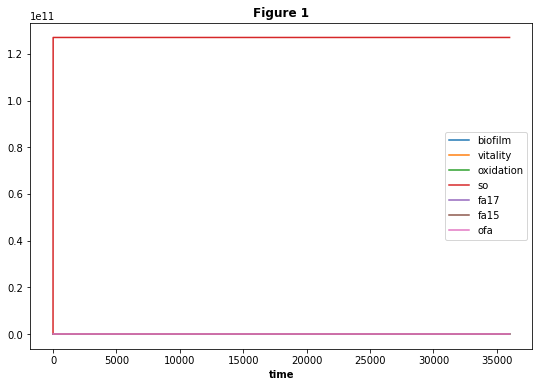

In [19]:
import os
%run ../pdipy/core.py

cwd = os.getcwd()
pdi = PDIBacterialPkg()
light = pdi.define(bacterial_species = 'Saureus', porphyrin_selection = 'A3B_4Zn', porphyrin_conc = 1, light_source = 'LED', irradiance = 37.92)
pdi.simulate(light, total_time = 600, timestep = 10, kinetc_constant = 1, omex_file_path = cwd)

%matplotlib inline